# **Capstone Project: AirBnb Bookings Analysis**


**Project Type - Exploratory Data Analysis (EDA)**

**Name -Laxmi Kumari**

**GitHub Link -**https://github.com/lk11996/AirBnb-Bookings-Analysis-Exploratory-Data-Analysis/blob/main/Capstone_Project_Airbnb_Analysis.ipynb

# **Project Summary -**

This project aimed to analyze a dataset of Airbnb listings in New York City to uncover key factors influencing pricing and availability. The first step involved cleaning and preparing the data, ensuring accuracy and consistency for reliable analysis.

Data exploration was key, revealing patterns and trends through descriptive statistics and visualizations. For instance, we investigated how factors like minimum nights, number of reviews, and host listing count correlated with pricing. Visualizations helped us understand how availability varied across different neighborhoods.

The insights gained from this analysis are valuable for both travelers and Airbnb hosts. Travelers can use this information to make informed decisions about where and when to book, while hosts can leverage these insights to optimize their listings and increase their chances of success. Overall, this project provided a deeper understanding of the Airbnb market in New York City, contributing to a more informed and data-driven approach to the platform.




# **Problem Statements -**

**Project Task:** The goal of this project is to analyze the dataset and extract valuable insights that stakeholders can leverage to drive business enhancements and strategic decisions.

**Business Objective:** objective of this project is to uncover areas for improvement and identify key patterns in customer preferences. These insights will guide actions that enhance customer satisfaction and optimize business performance, ultimately aligning offerings with guest expectations and market demand.

# **Let's Begin !**

# **1. Know Your Data**

**Import Libraries**








In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns
import openpyxl
pd.set_option('display.max_columns', 200)

**Dataset Loading**

In [ ]:
# Load Dataset
'''Creating a dataframe of the given dataset'''
airbnb_df = pd.read_csv('/content//Airbnb NYC 2019 (1).csv')

**Dataset First View**

In [ ]:
# Dataset First Look
airbnb_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


This table provides a concise overview of the features that define the dataset we'll be exploring. Now, let's dive deep into this data and uncover valuable insights!

In [ ]:
# Let's check for all the columns we have in our dataset.
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Here is the list of all our columns in the dataset.write this other way

**# Dataset Rows & Columns count**

In [ ]:
# Dataset Rows & Columns count
airbnb_df.shape

(48895, 16)

**Dataset Information**

In [ ]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here we can see the division of Categorical and Numerical values in our dataset,

We can see:-

3 columns have float64 data values (Numerical)
7 columns have int64 data type values (Numerical)
6 columns have object data type values (Categorical)

**Duplicate Values**

In [ ]:
# Dataset Duplicate Value Count
duplicated_values = airbnb_df[airbnb_df.duplicated()]
duplicated_values

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


The provided table lists different features of a listing and their corresponding descriptions. While there are no exact duplicate values in the descriptions, it's important to examine columns like "id" and "name" to ensure that there are no duplicate values across listings. These columns typically hold unique identifiers and should not repeat.

In [ ]:
# Let us first check for 'id' column.
duplicated_id = airbnb_df[airbnb_df.duplicated(subset=['id'])]
duplicated_id

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


now we can see there are no duplicates 'id's in our dataset.

In [ ]:
# Now let us check for 'name' column.
duplicated_name = airbnb_df[airbnb_df.duplicated(subset=['name'])]
duplicated_name

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
580,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158
661,250537,The Lenox in Harlem,1313306,Yvette,Manhattan,Harlem,40.81122,-73.94279,Entire home/apt,400,5,0,NaN,NaN,2,365
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48684,36382847,Comfort home,266211707,Yan,Brooklyn,Sunset Park,40.64439,-74.01816,Private room,185,1,0,NaN,NaN,2,177
48735,36412461,"Sunny, Cozy, Private Room In The Heart of Bush...",147515897,Flávia,Brooklyn,Bushwick,40.70366,-73.92728,Private room,84,3,0,NaN,NaN,1,28
48759,36420404,Home Sweet Home,273656890,Liana,Manhattan,East Harlem,40.79266,-73.94740,Private room,50,1,0,NaN,NaN,1,81
48791,36427922,Home away from home,238163900,Lucy,Queens,Cambria Heights,40.68557,-73.72731,Private room,50,3,0,NaN,NaN,1,176


As we can see the table has 998 rows with duplicated values, which suggests some errors or inconsistencies in the data. To understand the reason for these duplicates, it would be helpful to examine any single row in detail and compare it to other rows for potential discrepancies.






In [ ]:
# We can check for any specific row having the name value included in the duplicated data, using the query command.
# Let's check for where name is 'Superior @ Box House', which is in our duplicated data.
airbnb_df.query('name == "Superior @ Box House"')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
321,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73749,-73.95292,Private room,179,3,36,2019-07-01,0.36,28,79
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
682,253846,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73731,-73.95450,Private room,179,3,4,2015-12-04,0.05,28,81


Here we can observe that almost all the values are same except for the id, latitude, longitude, number_of_reviews, reviews_per_month, availability_365. However these columns can be different, and they are not so important.

In [ ]:
# To tackle this issue we will create a new data frame in which we will include
# only those columns which are really important for us.
airbnb_df = airbnb_df[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']].copy()

we created a new data frame so now we will be able to handle duplicated values more efficiently.

In [ ]:
# Let's check for the duplicated values of any other row.
airbnb_df.query('name == "Loft w/ Terrace @ Box House Hotel"')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
328,80700,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73738,-73.95482,Private room,349,3,7,2019-05-24,0.07,28,60
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
680,253839,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73783,-73.95259,Private room,249,3,3,2015-11-03,0.03,28,60


The table describes features of Airbnb listings, providing concise explanations for each column. It implies that most listing attributes remain relatively static, except for pricing, which is subject to market dynamics.

In [ ]:
# In this case we will seek out the duplicated values for those columns which
# are concerning and may effect the data if duplicated.

# Checking for the values where - 'name', 'host_name','neighbourhood_group', 'neighbourhood', 'room_type' are duplicated.
airbnb_df.loc[airbnb_df.duplicated(subset= ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'])]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
580,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84
670,253475,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73794,-73.95254,Entire home/apt,199,3,59,2019-06-24,0.66,28,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47876,35966653,"Bright, contemporary and best location",24232061,Tracy,Manhattan,Upper East Side,40.77297,-73.95530,Private room,122,10,0,NaN,NaN,3,306
48026,36039574,★Premier Queen Room with Balcony ★,270874051,Hotel Vetiver,Queens,Long Island City,40.75300,-73.93485,Private room,99,1,0,NaN,NaN,8,319
48207,36139806,"30 mins to Times Square!! 15 mins LGA, 25mins ...",260209224,Lotay,Queens,Jackson Heights,40.75077,-73.87020,Entire home/apt,67,2,0,NaN,NaN,3,134
48662,36372006,Very Clean Private Room Near Buses & Restauran...,118405437,PengYu,Queens,Woodhaven,40.69411,-73.86877,Private room,66,1,0,NaN,NaN,2,365


In [ ]:
# Let's check for any specific value.
airbnb_df.query('name == "✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿"')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
579,219793,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71813,-73.98416,Entire home/apt,199,1,29,2015-06-03,0.31,2,162
580,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158


The data has duplicated values except for 'last_review' and 'reviews_per_month'. To drop these duplicate values, we need a timestamp to sort the dataframe by the latest entries. The 'last_review' column can be used as a timestamp for the dataset.

In [ ]:
# Converting the 'last_review' column in a datetime format.
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])
# Now let us sort the data by the last_review column
airbnb_df = airbnb_df.sort_values(by='last_review', ascending=False).reset_index(drop=True)

In [ ]:
# Replacing NA Values
airbnb_df['last_review'].replace(np.nan,airbnb_df['last_review'].max(), inplace=True)

# Let's sort the values again
airbnb_df = airbnb_df.sort_values(by='last_review', ascending=False).reset_index(drop=True)

In [ ]:
# Dropping duplicated values
airbnb_df = airbnb_df.drop_duplicates(subset=['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'], keep='first').reset_index(drop=True)

# Now the duplicated columns have been dropped, let's check the current shape of our data frame.
airbnb_df.shape # (48655, 14)

# Let's check if there are any duplicated values now
airbnb_df[airbnb_df.duplicated(subset=['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'])] # No values

airbnb_df.query('name == "✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿"') # The latest value shows up

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48036,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158


We have successfully removed the duplicate records, leaving us with only the most recent data entries.

**Missing Values/Null Values**

In [ ]:
# Missing Values/Null Values Count
null_values = airbnb_df.isnull()
null_value_count = null_values.sum()

# Visualizing the missing values
null_value_count

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Although there were missing values in the name and host_name columns, we can still manage the data since their corresponding IDs are available. Now, let's proceed to check for any outliers.

In [ ]:
# To check the outliers we need to check the columns which are having numerical data.
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.866200e+04,4.866200e+04,48662.000000,48662.000000,48662.000000,48662.000000,48662.000000,48662,38673.000000,48662.000000,48662.000000
mean,1.900484e+07,6.746247e+07,40.728926,-73.952196,152.658173,7.002219,23.337738,2018-11-30 01:10:55.903990784,1.374940,6.989478,112.325079
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.462062e+06,7.802407e+06,40.690000,-73.983068,69.000000,1.000000,1.000000,2018-11-04 00:00:00,0.190000,1.000000,0.000000
50%,1.965763e+07,3.070801e+07,40.722985,-73.955660,105.000000,2.000000,5.000000,2019-06-14 00:00:00,0.720000,1.000000,44.000000
75%,2.913386e+07,1.074344e+08,40.763130,-73.936270,175.000000,5.000000,24.000000,2019-07-04 00:00:00,2.020000,2.000000,225.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098022e+07,7.851441e+07,0.054569,0.046098,240.418499,20.535357,44.628214,NaN,1.680639,32.484620,131.417220


If we look into this data we can see that the price and the minimum_nights columns are the most concerning ones, in these 2 columns we need to find the outliers and drop them.

In [ ]:
# As we see above the column_name 'calculated_host_listings_count' is quiet long
# Let's change it to 'listings'
airbnb_df.rename(columns={
    "calculated_host_listings_count": 'listings'
}, inplace=True)

# Lets check the price columns once
airbnb_df['price'].describe()

# As we can see the min price is 0 which is not likely to happen.
# According to the current website the price range starts from $25.
# In this case we will check for the prices which are below $25 and we will
# replace their values with 25 so that we can handle the outliers in price column.

airbnb_df['price'].replace(range(0, 25), 25, inplace=True) # replacing values
airbnb_df['price'].describe()

,price
count,48662.000000
mean,152.679791
std,240.406397
min,25.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,10000.000000


As the few price values were less than $25, which is not likely to happen, we have converted those values into 25, so that we may handle the outliers more efficiently, as there was other crucial info present in those rows.

In [ ]:
# Now let's check the minimum_nights column.
airbnb_df['minimum_nights'].describe()

# As the minimum value in this column is 1, we can work on only the upper limit.
# In this case if any value is more than 365 days, we will mark it as 365.

airbnb_df['minimum_nights'].replace(range(366, 1251), 365, inplace=True) # replacing values
airbnb_df['minimum_nights'].describe()

,minimum_nights
count,48662.000000
mean,6.914821
std,17.543710
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,365.000000


Now we have modified the outliers, we can move ahead with our dataset ready to be wrangled for deriving insights.

**Here’s what we know about the Airbnb NYC 2019 Dataset:**

It contains 48,895 rows and 16 columns.
The dataset consists of both categorical and numerical data, distributed as follows:
3 columns with float64 data type (numerical)
7 columns with int64 data type (numerical)
6 columns with object data type (categorical)
The dataset's primary key is the "id" column, which holds unique identifiers for each listing.

Column names include: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

There were no exact duplicates in the dataset, but the "name" column had 998 instances where values were duplicated. Most of these rows had nearly identical information, except for the price, which likely varied due to changing market conditions while the listing remained the same.

To handle these cases, we sorted the dataset based on the most recent entries. The "last_review" column was used as a timestamp to help identify the latest records.

After applying the necessary operations, we successfully dealt with the duplicate values.

The columns with the most missing values are:

last_review = 10,052 missing entries
reviews_per_month = 10,052 missing entries
For the missing values in the last_review column, we replaced the NA values with the most recent date available in the dataset to maintain the integrity of the timestamp.

Additionally, some "name" and "host_name" values were missing:

name = 16 missing entries
host_name = 21 missing entries

We have now successfully cleaned and formatted the dataset, and it is ready for further data wrangling steps.

# **2. Understanding Your Variables**

In [ ]:
# Looking on our data once
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings,availability_365
0,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.0,1,1
1,15968426,Comfy spacious Astoria aptmt 15m from Manhattan,2753243,Jwanah,Queens,Astoria,40.76248,-73.92422,Private room,56,3,0,2019-07-08,NaN,1,0
2,16000062,Charming Carriage House near Prospect Park,4366974,Ariana,Brooklyn,Crown Heights,40.67320,-73.96195,Entire home/apt,300,7,0,2019-07-08,NaN,1,0
3,15998231,Cozy Room in Brownstone,20327528,Miller,Brooklyn,Bedford-Stuyvesant,40.68631,-73.95597,Private room,35,3,0,2019-07-08,NaN,1,0
4,15987034,near Williamsburg/Manhattan/ Greenpoint - 1 b/1b,19803201,Gino,Brooklyn,Greenpoint,40.72388,-73.94040,Entire home/apt,150,3,0,2019-07-08,NaN,2,364


In [ ]:
# Dataset Columns
df_columns = airbnb_df.columns
df_columns # All the columns of our cleaned data.

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'listings', 'availability_365'],
      dtype='object')

Variables can generally be divided into three categories based on their functions:

Numerical Variables: These variables express quantities and can be split into:

Continuous Variables: Capable of taking any value within a specified range, allowing for a seamless flow of data.
Discrete Variables: Limited to specific values, typically linked to distinct categories or identities.
Categorical Variables: These represent qualitative information and are grouped into:

Nominal Variables: Represent categories without any particular order or ranking.
Ordinal Variables: Represent categories that follow a specific order and can be ranked accordingly.
Time Variables: These represent date and time information, providing timestamps that allow tracking of events over time.

In [ ]:
# Dataset Describe
df_describe = airbnb_df.describe()
df_describe # These are all the numerical variables in our dataset.

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings,availability_365
count,4.866200e+04,4.866200e+04,48662.000000,48662.000000,48662.000000,48662.000000,48662.000000,48662,38673.000000,48662.000000,48662.000000
mean,1.900484e+07,6.746247e+07,40.728926,-73.952196,152.679791,6.914821,23.337738,2018-11-30 01:10:55.903990784,1.374940,6.989478,112.325079
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,25.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.462062e+06,7.802407e+06,40.690000,-73.983068,69.000000,1.000000,1.000000,2018-11-04 00:00:00,0.190000,1.000000,0.000000
50%,1.965763e+07,3.070801e+07,40.722985,-73.955660,105.000000,2.000000,5.000000,2019-06-14 00:00:00,0.720000,1.000000,44.000000
75%,2.913386e+07,1.074344e+08,40.763130,-73.936270,175.000000,5.000000,24.000000,2019-07-04 00:00:00,2.020000,2.000000,225.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098022e+07,7.851441e+07,0.054569,0.046098,240.406397,17.543710,44.628214,NaN,1.680639,32.484620,131.417220




**Variable Description:**


 We have a variety of outputs to analyze, which can help us draw insights and make conclusions based on the data. For instance, the dataset includes a wide range of prices, but the average price favored by customers tends to be around 150. This gives us a clear indication of the typical budget range and preferences of guests.

**Check Unique Values for each variable.**

In [ ]:
# Check Unique Values for each variable.
def unique_value(df):
  for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

# **3. Data Wrangling**



As our Data cleaning, Data transformation, and Handling outliers has been completed, now we will be working on "Feature Engineering".

In [ ]:
# Let's create a new column with the price range distribution.
# We will use it while working with the price column.
start = 0
end = 10000
breakpoints = np.linspace(start, end, num=101)
breakpoints = breakpoints.astype(int)
def price_range(amt):
    bp = breakpoints
    for i in range(len(breakpoints)-1):
        if bp[i] <= amt <= bp[i+1]:
            return f"{bp[i]} - {bp[i+1]}"


airbnb_df['price_range'] = airbnb_df['price'].apply(lambda amt: price_range(amt))
airbnb_df['price_range']

,price_range
0,0 - 100
1,0 - 100
2,200 - 300
3,0 - 100
4,100 - 200
...,...
48657,0 - 100
48658,100 - 200
48659,0 - 100
48660,200 - 300


Creating a price range column offers several advantages:

Data Summarization: It provides a clear and concise overview of the price distribution within the dataset.

Visualization: Grouping data by price range allows for more effective visual representation compared to using individual prices.

Segmentation and Analysis: By dividing prices into distinct ranges, it becomes easier to compare and analyze different price segments.

Decision Making: This information can support decision-making in various contexts, such as offering recommendations to customers based on their budget and preferences.

Communicating Insights: A price range column effectively conveys customer budgets and preferences, helping identify where the majority of customers fall in terms of purchasing power.

In [ ]:
# Let's take a look at our dataset once.
airbnb_df.head()

# As we can see our dataset is sorted according to the last review, let us sort our dataset according to the price.
airbnb_df.sort_values(by='price', ascending=False, inplace=True)

# Let's take a look at our price sorted dataset once.
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings,availability_365,price_range
46635,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,9900 - 10000
1809,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,2019-07-08,NaN,1,83,9900 - 10000
42906,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0,9900 - 10000
46974,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83,9900 - 10000
9953,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,2019-07-08,NaN,1,365,9900 - 10000


In [ ]:
# Let us check our columns and filter those columns that will work as our features.
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'listings', 'availability_365', 'price_range'],
      dtype='object')

In [ ]:
# Let filter the dataframe with only the required columns.
feature_df = airbnb_df[['id', 'name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'listings',
       'availability_365', 'price_range']]

feature_df = feature_df.reset_index(drop=True)
feature_df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,listings,availability_365,price_range
0,7003697,Furnished room in Astoria apartment,20582832,Queens,Astoria,Private room,10000,100,2,0.04,1,0,9900 - 10000
1,22436899,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,Entire home/apt,10000,30,0,NaN,1,83,9900 - 10000
2,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,Entire home/apt,10000,5,5,0.16,1,0,9900 - 10000
3,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,Private room,9999,99,6,0.14,1,83,9900 - 10000
4,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Manhattan,Lower East Side,Entire home/apt,9999,30,0,NaN,1,365,9900 - 10000


In [ ]:
feature_df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,listings,availability_365,price_range
0,7003697,Furnished room in Astoria apartment,20582832,Queens,Astoria,Private room,10000,100,2,0.04,1,0,9900 - 10000
1,22436899,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,Entire home/apt,10000,30,0,NaN,1,83,9900 - 10000
2,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,Entire home/apt,10000,5,5,0.16,1,0,9900 - 10000
3,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,Private room,9999,99,6,0.14,1,83,9900 - 10000
4,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Manhattan,Lower East Side,Entire home/apt,9999,30,0,NaN,1,365,9900 - 10000


As we can see we are having few groups in our datasets, let us check what all insights we can derive from them, by seeking information according to the groups.

In [ ]:
# Let's check the top performing Host as per the total listing count
host_groups = feature_df.groupby('name')
hosts = []
no_of_listings = []
host_prices = []
for host, data in host_groups:
  hosts.append(host)
  no_of_listings.append(data['listings'].sum())
  host_prices.append(data['price'].mean())

host_df = pd.DataFrame({
    'Host Name': hosts,
    'Total Listings': no_of_listings,
    'Price': host_prices
})
host_df = host_df.sort_values(by='Total Listings', ascending=False).reset_index(drop=True)
host_df = host_df.drop_duplicates(subset='Total Listings').reset_index(drop=True)
top_10_hosts = host_df.head(10)

host_df['Revenue'] = (host_df['Total Listings'])*(host_df['Price'])
top_host_revenue = host_df.sort_values(by='Revenue', ascending=False).reset_index(drop=True)
top_host_revenue.head(10)

,Host Name,Total Listings,Price,Revenue
0,Pleasant 1BR in Midtown East by Sonder,654,197.000000,128838.0
1,"Central Herald Sq.1BR w/ Roofdeck, Gym next to...",232,334.000000,77488.0
2,Sonder | Stock Exchange | Gorgeous 1BR + Kitchen,327,230.000000,75210.0
3,"West 55th street, Lux 1bd Serviced Apartment",261,251.666667,65685.0
4,West 15th Street Cozy Chelsea 1bd Serviced Apt,174,200.000000,34800.0
5,2BR WITH PRIVATE PATIO EAST VILLAGE,114,249.000000,28386.0
6,Cozy Studio Apt Upper East Side Near Hospitals,121,199.000000,24079.0
7,A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE,98,212.500000,20825.0
8,Sonder | 21 Chelsea | Lively Studio + Rooftop,96,202.000000,19392.0
9,Charming Upper West Side Apartment,92,166.500000,15318.0


In [ ]:
# First let's check how many neighbourhood_groups are there.
feature_df['neighbourhood_group'].unique() # There are 5 different groups.

# ['Brooklyn', 'Queens', 'Manhattan', 'Staten Island', 'Bronx']
#  let's group our dataset according to the neighbourhood groups.

n_groups = feature_df.groupby('neighbourhood_group')

# Let's check which group is most prefered as per the listings, and no. of reviews.
groups = [] # To save the groups
listings = []
reviews = []
max_price = []
min_price = []
for group, data in n_groups:
  groups.append(group)
  listings.append(data['listings'].sum())
  reviews.append(data['number_of_reviews'].sum())
  max_price.append(data['price'].max())
  min_price.append(data['price'].min())

group_feat_df = pd.DataFrame({
    'Group': groups,
    'Listing Count': listings,
    'No._of_reviews': reviews,
    'Min Price': min_price,
    'Max Price': max_price
})

group_feat_df
# Here we can see that Manhattan group is the most prefered group as per the listings.
# However the most reviews are given to the Brooklyn group.

# Now let's divide our dataset as per the room types, and create their groups.
# First let's check how room_types are there.

feature_df['room_type'].unique() # There are 3 room types.

# ['Entire home/apt', 'Private room', 'Shared room']
#  let's group our dataset according to the room types.

room_groups = feature_df.groupby('room_type')
rooms = []
room_listings = []
room_reviews = []
max_room_price = []
min_room_price = []
for room_type, room_data in room_groups:
    rooms.append(room_type)
    room_listings.append(room_data['listings'].sum())
    max_room_price.append(room_data['price'].max())
    min_room_price.append(room_data['price'].min())

room_feat_df = pd.DataFrame({
    'Group': rooms,
    'Listing Count': room_listings,
    'Min Price': min_room_price,
    'Max Price': max_room_price
})

room_feat_df
# Here we can see the most prefered room type is the Entire home/apt.
# The most reviews are also given to the Entire home/apt.
# Shared rooms are the least prefered.

,Group,Listing Count,Min Price,Max Price
0,Entire home/apt,263986,25,10000
1,Private room,70813,25,10000
2,Shared room,5323,25,1800


In [ ]:
 #Now let us check how many different neighbourhoods are there in total.
feature_df['neighbourhood'].count() # There are 48655 neighbourhoods

# Now let us check what are the top 10 most prefered neighbourhoods.
# Also, let's check their average pricing and average price range.
area_groups = feature_df.groupby('neighbourhood')
areas = []
listing_count = []
avg_price = []
for area, n_data in area_groups:
  areas.append(area)
  listing_count.append(n_data['listings'].sum())
  avg_price.append(round(n_data['price'].mean(), 2))

area_feat_df = pd.DataFrame({
    'Area': areas,
    'Listing Count': listing_count,
    'Average Price': avg_price,
})

area_feat_df = area_feat_df.sort_values(by='Listing Count', ascending=False).reset_index(drop=True)
area_feat_df.head(10)

,Area,Listing Count,Average Price
0,Financial District,84942,226.03
1,Hell's Kitchen,24754,205.33
2,Murray Hill,24726,221.18
3,Midtown,24647,282.66
4,Chelsea,17483,248.36
5,Theater District,16151,242.67
6,Upper East Side,14909,189.10
7,Upper West Side,13201,211.25
8,Bedford-Stuyvesant,9605,107.77
9,Tribeca,7519,492.23


In the above manipulations we have created and worked with few groups that were there in our dataset, based upon which we were able to derive few insights.

In [ ]:
# Let us now work with relationships.
# Relationship: Price vs. Room Type
# Checking the distribution of prices for different room types.
# "room_groups" is our grouped dataframe we will be using this.

avg_room_price = []
for room, data in room_groups:
  avg_room_price.append(data['price'].mean())

room_vs_price = pd.DataFrame({
    'Room Type': rooms,
    'Avg_Price': avg_room_price
})

room_vs_price

# As we can see here the Entire home/apt is having the highest pricing.

,Room Type,Avg_Price
0,Entire home/apt,211.692566
1,Private room,89.631218
2,Shared room,70.536395


In [ ]:
# Relationship: Reviews per Month vs. Room Type
# Comparing the distribution of reviews per month for different room types.

total_reviews = []
for room, data in room_groups:
  total_reviews.append(data['reviews_per_month'].sum())

room_vs_reviews = pd.DataFrame({
    'Room Type': rooms,
    'Reviews': total_reviews
})

room_vs_reviews
# As we can see here the Entire home/apt is having the highest no. of reviews per month.

,Room Type,Reviews
0,Entire home/apt,26525.13
1,Private room,25415.29
2,Shared room,1232.65


**Here’s an overview of the manipulations we performed and the insights we uncovered:**

This Airbnb dataset provided a wealth of well-distributed data, which is a key advantage for our analysis. Since location is crucial in Airbnb listings, the information was effectively spread across different areas, which was beneficial for understanding the geographical impact on pricing and preferences.

We carried out several data manipulations to extract insights that would be valuable for stakeholders in making informed business decisions. Additionally, these findings will help hosts understand customer preferences better, as outlined in our initial objectives.

We divided our analysis into two primary sections: feature-based analysis and relationship-based analysis, which allowed us to draw more meaningful conclusions.

Key Manipulations:
Created a Price Range Column: This column helped categorize the price distribution, making it easier to analyze customer budget preferences. We kept the ranges concise to improve clarity.

Sorted Data by Price: The dataset was initially unordered. We sorted it based on price, with the most expensive listings at the top, providing a clearer view of pricing trends.

Filtered the Dataset: To reduce complexity and focus on the most relevant information, we filtered out unnecessary columns, streamlining the data for analysis and feature engineering.

Categorized Data into Groups: We grouped data based on categorical features to derive more structured insights. This helped us obtain targeted information about different segments. The key groups created were:

Neighbourhood Group: This helped identify the most popular neighborhoods among guests.
Room Type Groups: Allowed us to pinpoint which room type was preferred by customers.
Neighbourhood Area Groups: This provided insights into the most preferred areas within each neighborhood.
Key Relationships Explored:
Price vs. Room Type:

We analyzed the price distribution across different room types.
Identified which room types had the highest price distribution.
Reviews per Month vs. Room Type:

Examined the number of reviews per month for each room type.
This provided insight into customer engagement and satisfaction based on room type.
Price vs. Neighbourhood:

Compared prices across different neighborhoods.
Identified which neighborhoods had higher or lower average prices and noted any price variations.
Purpose:
These manipulations allowed us to uncover valuable insights that will support business growth for both Airbnb and the hosts. Ultimately, this information can enhance the customer experience by helping tailor offerings to match guest preferences and budgets.

We will present more detailed insights alongside visualizations, making it easier to interpret and understand the findings in context.

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

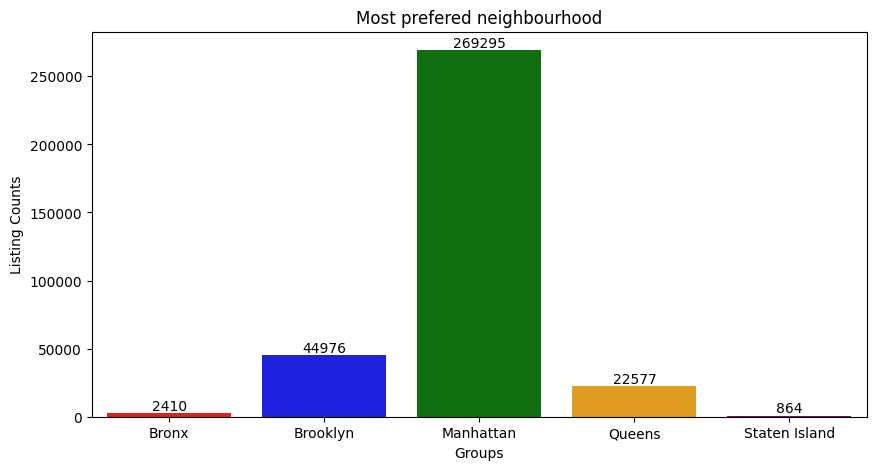

In [ ]:
# Chart - 1 visualization code
# Let's visualize the most prefered neighbourhood group with a bar chart

group_feat_df # As we have already created a dataframe for the groups

plt.figure(figsize=(10,5))
# plt.plot(groups,listings, color='black', marker = "o", markerfacecolor = 'blue', markeredgecolor='blue',linestyle='-')
colors = ['red', 'blue', 'green', 'orange', 'purple'] # To make each bar with a different color
sns.barplot(x="Group", y='Listing Count', data=group_feat_df, hue='Group', palette=colors, legend=False)
plt.xlabel('Groups')
plt.ylabel('Listing Counts')
plt.title('Most prefered neighbourhood')
for x, y in zip(range(len(groups)), listings):
    plt.text(x, y, f'{y}', ha='center', va='bottom') # To annotate each bar with the exact value

**1. Why did you choose this specific chart?**

 We needed to identify which group had the highest customer preference and wanted to compare the performance across all groups. A bar chart was the most suitable choice for this purpose, as it effectively displays the values for each group and allows for easy comparison.

**2. What insights were gained from the chart? **

The chart clearly shows that Manhattan is the top preferred group, significantly outperforming the other groups. Brooklyn comes in second in terms of customer preference after Manhattan.

**3. Will the insights create a positive business impact? Are there any insights that could lead to negative growth? Justify your answer.**

Yes, these insights will positively impact the business. Understanding customer preferences allows us to focus on areas with high demand and better meet their expectations. For example, since Manhattan is the most popular group, we can target customers with listings available in that area to maximize satisfaction.

On the other hand, the low demand in other neighborhoods might suggest potential challenges for growth in those areas. However, by identifying why Manhattan is so popular, we can work on addressing the gaps in other neighborhoods and develop strategies to boost demand there. This insight provides an opportunity to understand and tackle the reasons behind lower performance in less preferred areas.

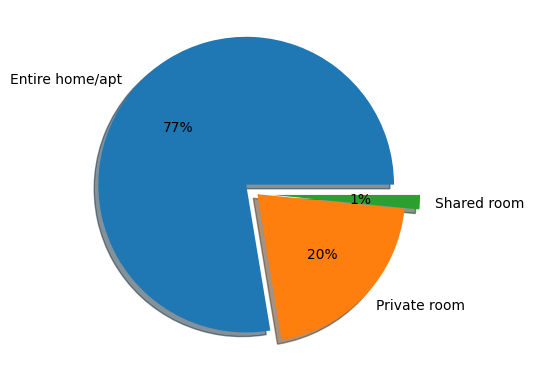

In [ ]:
# Chart - 2 visualization code
# Let's visualize the most prefered room type using a pie chart

room_feat_df # Our grouped df created earlier

# Plotting the data into a pie chart
plt.pie(room_feat_df['Listing Count'], labels=room_feat_df['Group'], autopct="%1i%%", explode=(0.1, 0, 0.1), shadow=True)
plt.show()

**1. Why did you choose this specific chart? **

Since there were only three room types to analyze, a pie chart was the ideal choice. It provides a clear visualization of the distribution of listings and highlights the differences between the room types. Additionally, the pie chart allows us to easily see the percentage breakdown, giving us a broader perspective on the data.

**2. What insights were gained from the chart?**

 The chart shows that "Entire Home/Apt" is the most popular room type, suggesting that customers prioritize privacy and prefer staying on their own without interruptions. In contrast, "Shared Rooms" are the least preferred and are likely more popular among students seeking affordable accommodations. This insight can help with more targeted marketing approaches.

**3. Will the insights lead to a positive business impact? Are there any insights that could cause negative growth? Justify your answer. **

Yes, these insights will drive positive business outcomes. Knowing the majority of customers prefer "Entire Home/Apt" allows us to focus advertising more efficiently and reduce unnecessary spending. Additionally, understanding the preferences for other room types helps us better target niche markets, such as students seeking affordable options. By catering to both high-demand and lower-demand sectors, we can expand our customer base and maximize growth, even in areas with less demand. This can serve as a strategic advantage for the business.








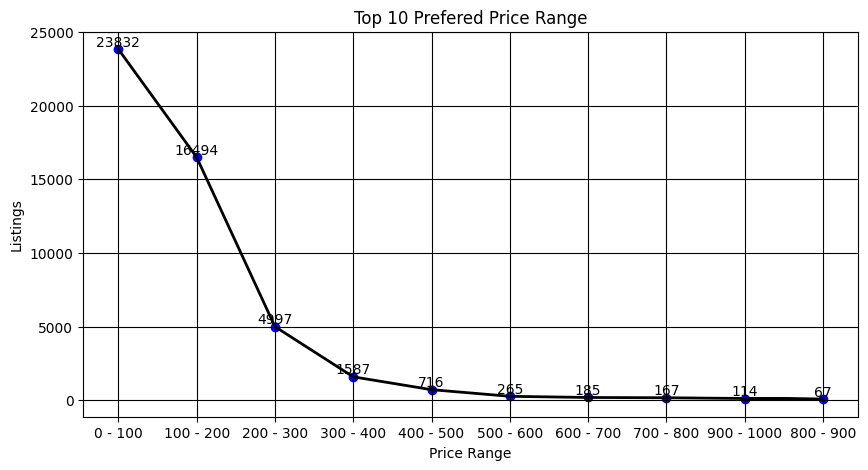

In [ ]:
# Chart -  visualization code
# Now let's check which price range has the most number of listings, it would give us an idea for the most prefered price range of our customers.
# Let's plot the top 10 most prefered price range on chart.
prefered_range = airbnb_df['price_range'].value_counts().head(10)
plt.figure(figsize=(10,5))

prefered_range_sorted = prefered_range.sort_index()
plt.scatter(prefered_range.index, prefered_range, color='blue', marker='o')
plt.plot(prefered_range_sorted.index, prefered_range_sorted, color='black', linestyle='-', linewidth=2, label='Line Connecting Dots')

for x, y in zip(prefered_range_sorted.index, prefered_range_sorted): # To annotate each plotted value
    plt.text(x, y, f'{y}', ha='center', va='bottom')
plt.title("Top 10 Prefered Price Range")
plt.xlabel("Price Range")
plt.ylabel("Listings")
plt.grid(color='black')

1. Why did you pick the specific chart?
The plot chart can give us the graphical representation of the preferences of our customers regarding prices and how do they go through each of the price ranges. As we can see the chart is giving us a fall in the preferences as the price range increases.

2. What is/are the insight(s) found from the chart?
Looking at this chart we can cleary see the budget preferences of our customers and we can see that the most prefered price range is the 0-100, however there is no 0 values as we have already dropped them. This can give us an idea on the spending power of our customers which will help us in setting better and more specific prices, also at the time of listings we can even make recommendations to our customers with their prefered price ranges.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes definitely, as customers like personalized interfaces and options, if we will focus on providing them the options that are there for them only, it would be really appreciated by them as they will not have to go through a lot while searching for things they are looking for specifically.

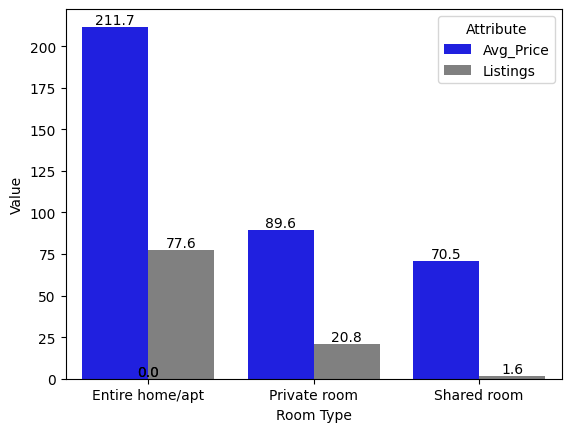

In [ ]:
# Chart -visualization code
# Let us now visualize the average price division with room types.

data = {
    'Room Type': room_vs_price['Room Type'],
    'Avg_Price': room_vs_price['Avg_Price'],
    'Listings': ((room_feat_df['Listing Count']/room_feat_df['Listing Count'].sum())*100)
}

# Creating a DataFrame
df = pd.DataFrame(data)

df_melted = pd.melt(df, id_vars='Room Type', var_name='Attribute', value_name='Value')
# Creating a strip plot
sns.barplot(x='Room Type', y='Value', data=df_melted, hue="Attribute", palette=['blue', 'grey'], legend=True)

# Applying annotations on the values
for p in plt.gca().patches:
    plt.gca().annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

1. Why did you pick the specific chart?
As we are only having 3 types it was better to use the bar chart for better visualizing the divisions of the average price and the percentage of the listings divided among these values altogether.

2. What is/are the insight(s) found from the chart?
As we can clearly see that the relationship between the average pricing the listing counts is direct, the highest pricing is in the Entire Home/Apt room type, and slo the listings division, which can be quite using in making decisions like pricing.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, as we can see what percentage is ready to pay which amount for their preferences we will be able to make better pricing strategies which will definitely assist us in the growth.

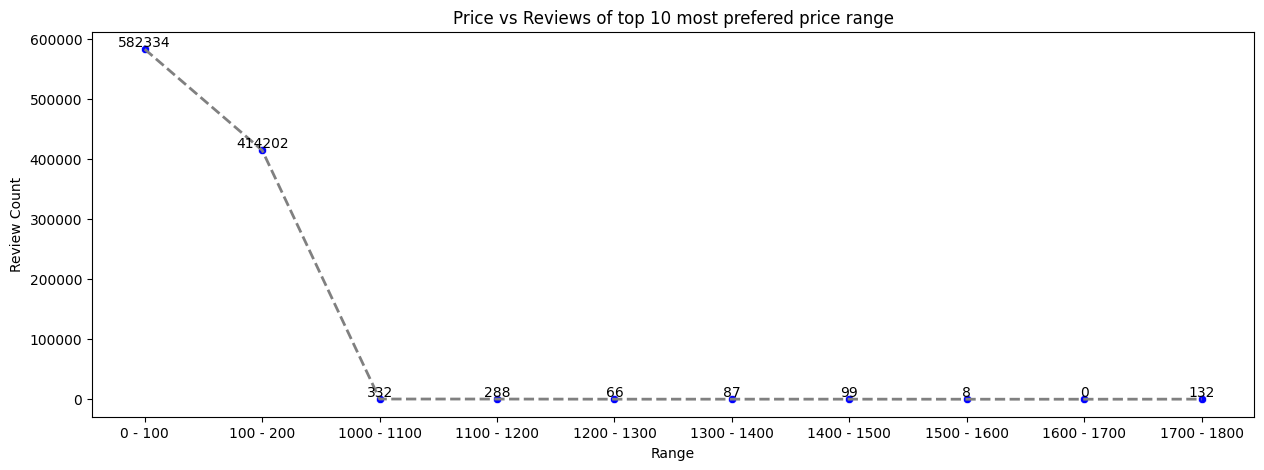

In [ ]:
# Chart -  visualization code
# Let's visualize the relationship between listing price and the number of reviews received.
# As we are having huge number of rows for this we will be taking only top 10 price ranges.
# For the listing prices we will take price_range

sorted_range = feature_df.sort_values(by='price_range', ascending=False)
sorted_range = sorted_range.groupby('price_range')
range_group = []
review_count = []
for range, data in sorted_range:
  range_group.append(range)
  review_count.append(data['number_of_reviews'].sum())

range_df = pd.DataFrame({
    'Range': range_group,
    'Review Count': review_count
})
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Range', y='Review Count', data=range_df.head(10), color='blue', legend=False, marker='o')
plt.plot(range_df['Range'].head(10), range_df['Review Count'].head(10), color='grey', linestyle='--', linewidth=2, label='Line Connecting Dots')
plt.title("Price vs Reviews of top 10 most prefered price range")
for x, y in zip(range_df['Range'].head(10), range_df['Review Count'].head(10)):
  plt.text(x, y, f'{y}', ha='center', va='bottom')

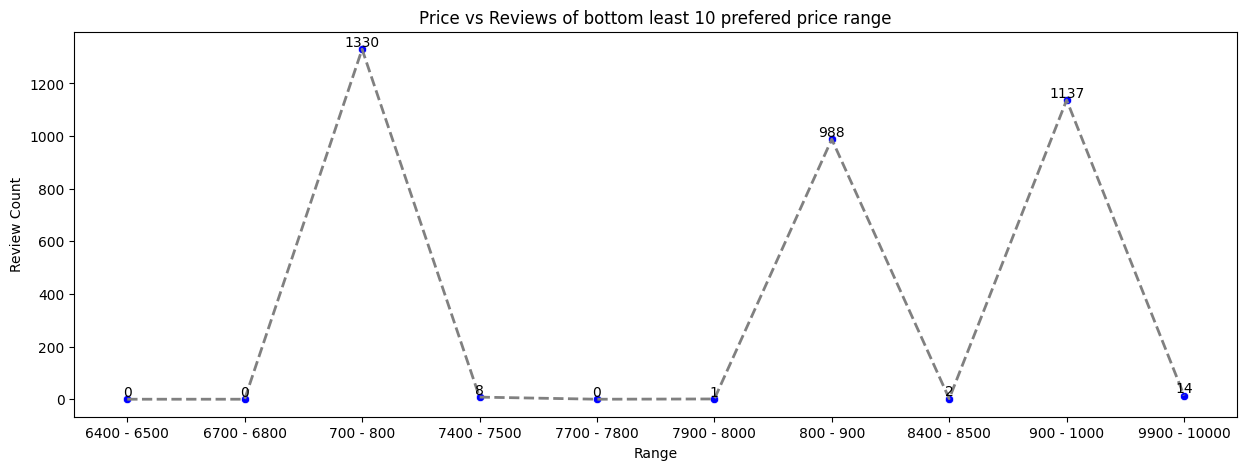

In [ ]:
# Let us also check for the least 10 prefered price ranges
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Range', y='Review Count', data=range_df.tail(10), color='blue', legend=False, marker='o')
plt.plot(range_df['Range'].tail(10), range_df['Review Count'].tail(10), color='grey', linestyle='--', linewidth=2, label='Line Connecting Dots')
plt.title("Price vs Reviews of bottom least 10 prefered price range")
for x, y in zip(range_df['Range'].tail(10), range_df['Review Count'].tail(10)):
  plt.text(x, y, f'{y}', ha='center', va='bottom')

1. Why did you pick the specific chart?
As the difference between the no. of reviews in the price range is very huge, using a plot chart is quiet handy so that the pointers can be seen clearly with respect to their values and also their differences.

2. What is/are the insight(s) found from the chart?
As we can see the price range and the no. of reviews are having inverse relationship, it cleary states that the budget of our majortiy customer base lies between the range 0 - 200.

We can also see that there are few preferences in the higher budget section as well where there is a competetion in the prices.

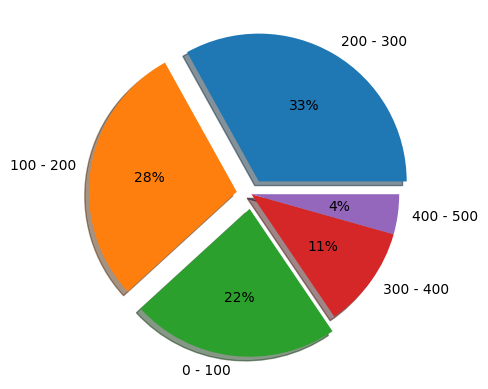

In [ ]:
# Chart visualization code
# Let us know the price range having the highest listings so as to get more specific idea on price preference.


sorted_range # Sorted Price Range grouped
range_group # List of all the price range groups
range_listing_count = []

for range, data in sorted_range:
  range_listing_count.append(data['listings'].sum())


range_list_df = pd.DataFrame({
    'Range': range_group,
    'Listing Count': range_listing_count
})

range_list_df = range_list_df.sort_values(by='Listing Count', ascending=False).reset_index(drop=True)

# We will be taking on the top 5 prefered ranges.
plt.pie(range_list_df['Listing Count'].head(), labels=range_list_df['Range'].head(), autopct="%1i%%", explode=(0.1, 0.1, 0.1, 0, 0), shadow=True)
plt.show()

1. Why did you pick the specific chart?
Pie chart is an effective chat to clearly see the distrubutions and preferences, it becomes easier to notice the division of listngs by the price range.

2. What is/are the insight(s) found from the chart?
As we can see form the chart:- The top 3 price ranges that are having the most listings are:-

200-300: 33%
100-200: 28%
0-100: 22%

<ipython-input-49-30fc849892e1>:21: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Area", y='Values', data=area_data_df.head(10), hue="Area", palette=colors, legend=False)


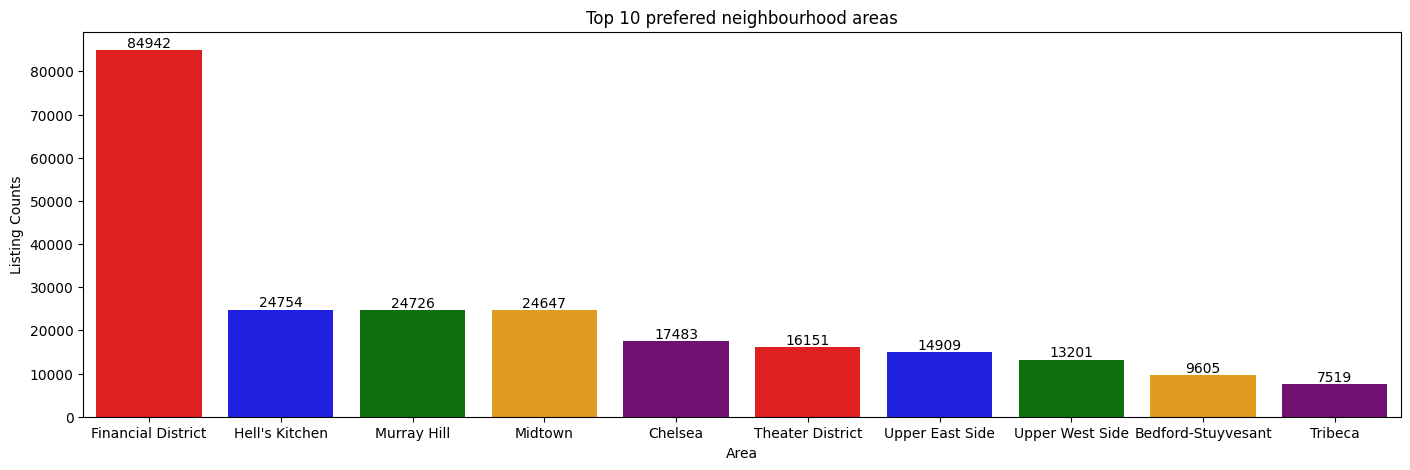

In [ ]:
# Chart visualization code
# As now we are having the price ranges with the most listings let us check the neighbourhoods with the most listings.

areas = []
area_listing = []
area_group = feature_df.groupby('neighbourhood')
for area, data in area_group:
    areas.append(area)
    area_listing.append(data['listings'].sum())

area_data_df = pd.DataFrame({
    "Area": areas,
    "Values": area_listing
})

area_data_df = area_data_df.sort_values(by='Values', ascending=False).reset_index(drop=True)
area_data_df
plt.figure(figsize=(17,5))
# plt.plot(groups,listings, color='black', marker = "o", markerfacecolor = 'blue', markeredgecolor='blue',linestyle='-')
colors = ['red', 'blue', 'green', 'orange', 'purple']
sns.barplot(x="Area", y='Values', data=area_data_df.head(10), hue="Area", palette=colors, legend=False)
plt.title('Top 10 prefered neighbourhood areas')
plt.xlabel('Area')
plt.ylabel('Listing Counts')
for x, y in zip(area_data_df['Area'].head(10), area_data_df['Values'].head(10)):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

1. Why did you pick the specific chart?
The bar chart clearly reflects the differece between the areas and the gap between them as per the listing counts, we can see the top ten most listed neighbourhoods.

2. What is/are the insight(s) found from the chart?
We can see that the most listed neighbourhood area is the 'Financial District' and it is also having a major gap between the other ones in the list, we can clearly see that the Financial District is the most prefered neighbourhood of our customers.

<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

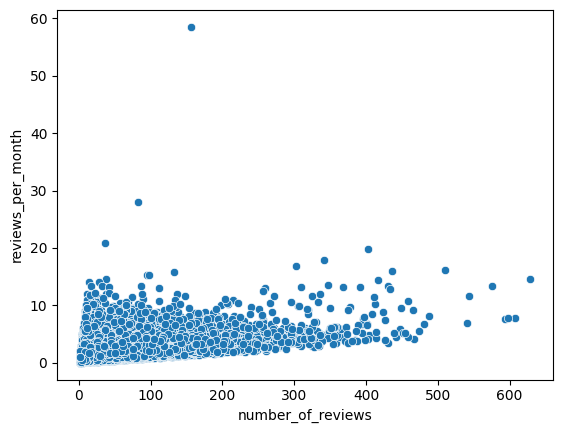

In [ ]:
# Chart  visualization code
# Reviews vs Review per month
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', data=feature_df)

1. Why did you pick the specific chart?
In this case using a scatter plot can easily tell us the frequency, as we can see the review traffic is not that scattere and is rather collective.

2. What is/are the insight(s) found from the chart?
As we can clearly see that there is an outlier as well, however the relationship between the reviews and reviews per month is quiet direct which means that the customer are getting satisfied with the outcomes, where the number of review is higher and the host is also getting good reach towards consumer market.

**Pair Plot**

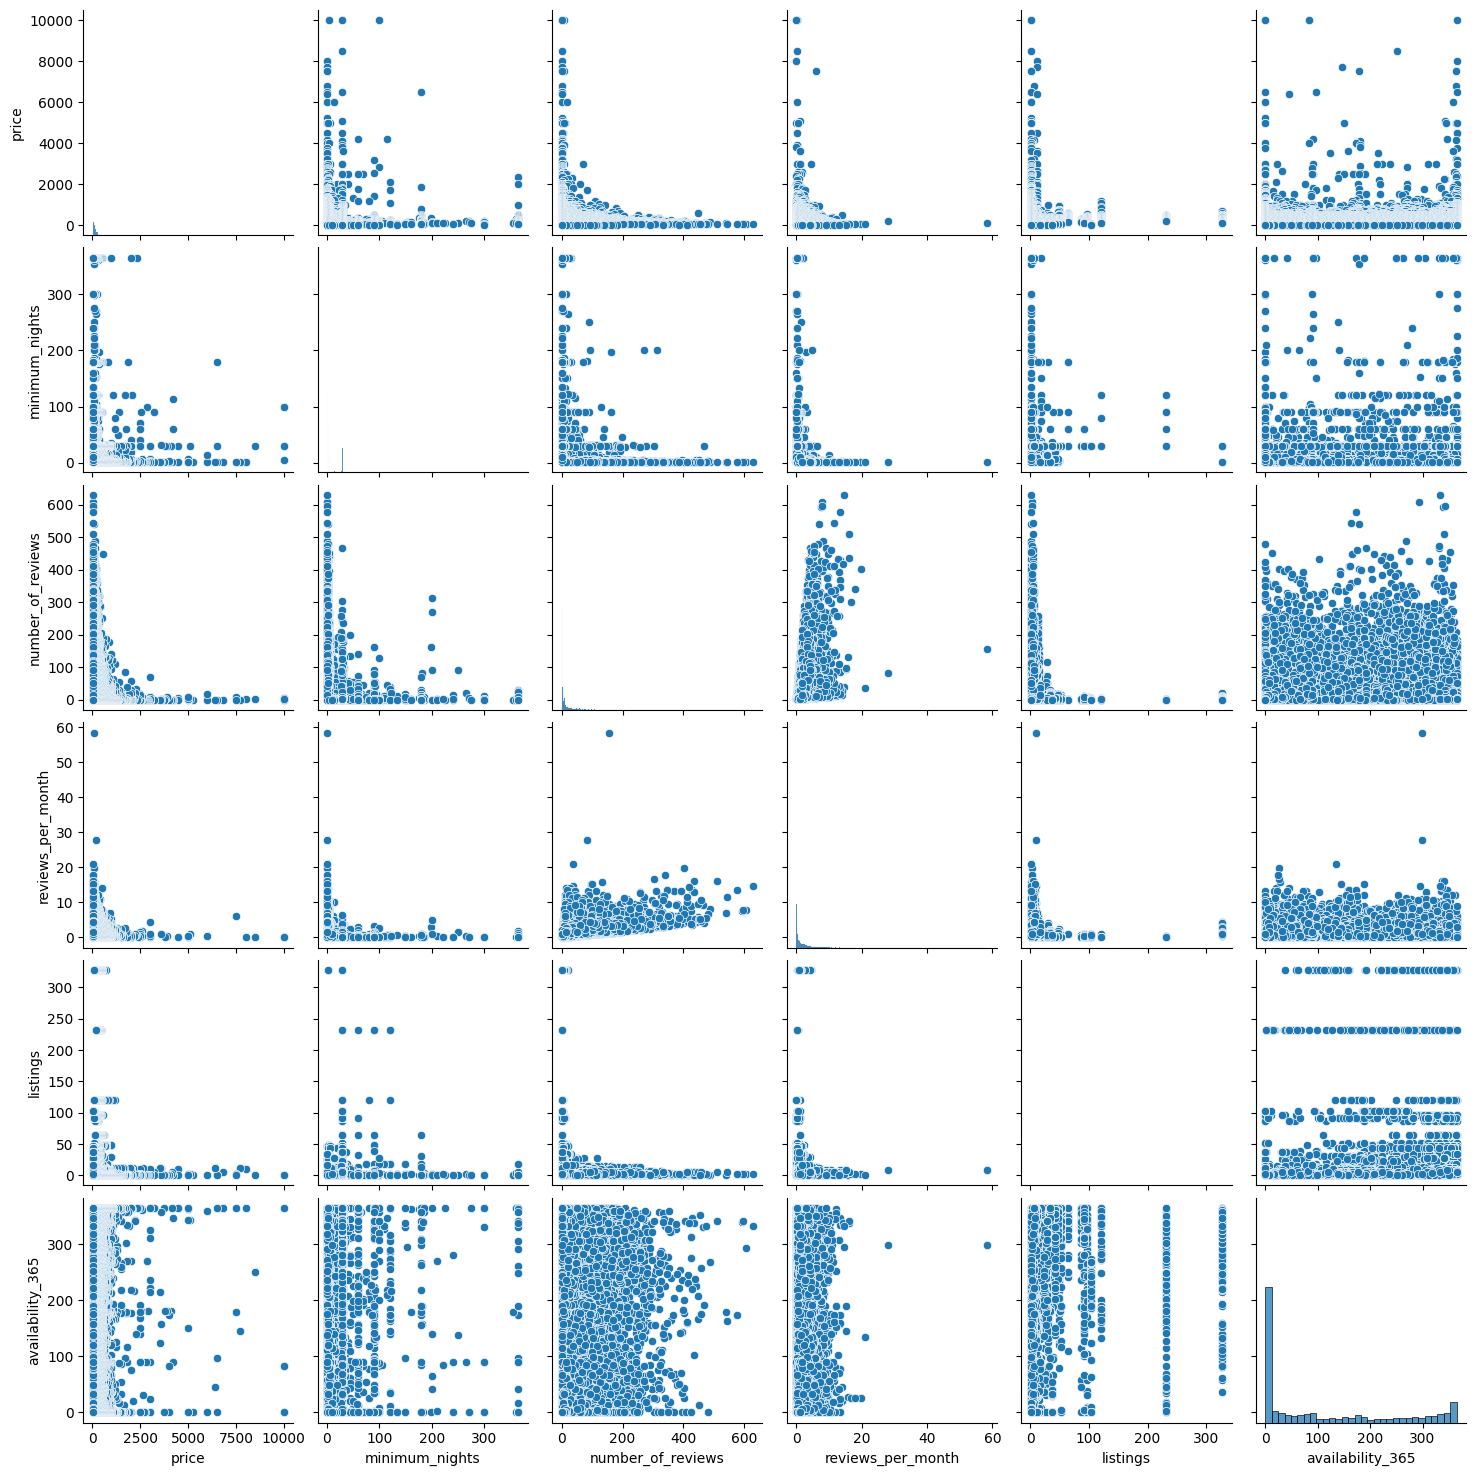

In [ ]:
# Chart - 9 visualization code
# Let's create a pairplot to know the relationship between our few variables.

pair_df = feature_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'listings', 'availability_365', 'price_range']]
sns.pairplot(pair_df)

1. Why did you pick the specific chart?
Here we can easily see the distribution of our numerical variables, it will also give us an overview of our dataset and the relationships between our variables.

2. What is/are the insight(s) found from the chart?
Yes, we can see that the utmost majority of our complete data set is within the price range of 0-2500.

**Correlation Heatmap**

<Axes: >

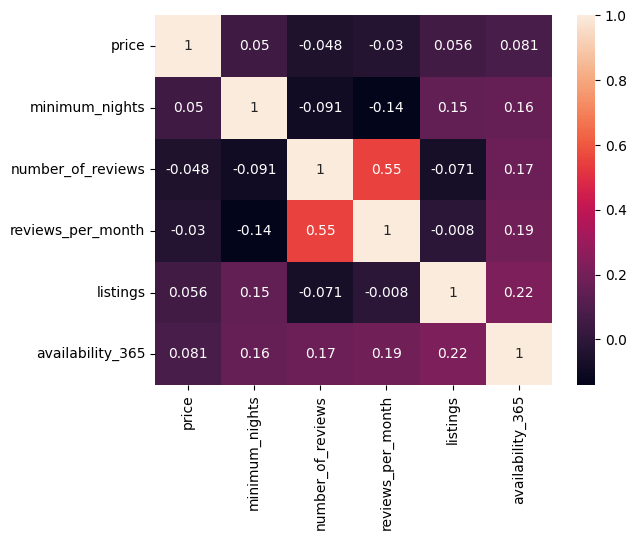

In [ ]:

# Chart - 10 visualization code
feature_df.describe()

# using corr() function to check the correlation between numeric columns.
corr_df = feature_df[['price', 'minimum_nights', 'number_of_reviews',
             'reviews_per_month', 'listings', 'availability_365']].corr()

# Visualizing correlation using seaborn heatmap, using annotations.
sns.heatmap(corr_df, annot=True)

**Why did you choose this specific chart?**

 The heatmap was selected to analyze the correlation between numeric columns because it effectively visualizes the strength of relationships using a color gradient. This allows for quick identification of correlations, ranging from weak to strong, and provides a comprehensive overview of the data at a glance.

**What insights were gained from the chart?**

The heatmap revealed which pairs of variables exhibit strong positive or negative correlations. It clarified the relationships among various variables and highlighted potential multicollinearity issues, which could be important to consider if we plan to conduct regression analysis.

**Will the insights contribute to a positive business impact?**

 Are there any insights that could lead to negative growth? Justify your answer. Yes, these insights will be invaluable when developing predictive models, as they reflect the current state of our business and reveal opportunities for improvement in various areas. However, if high correlations among independent variables are not addressed, they could lead to multicollinearity, potentially skewing the results of regression analyses and impacting decision-making.

# **5. Solution to Business Objective**

**Proposed Solution to Achieve Business Objective:**

After thoroughly analyzing the dataset, we have identified several key insights and strategies that can be leveraged to meet the business objectives:

1. Pricing Strategy: The most preferred price range is between $0-300, which provides a clear guideline for setting competitive prices. Focusing on this range will align with the majority of customer preferences, leading to better booking rates.

2. Room Type Preferences: Since "Entire home/apartment" is the most favored room type, it's evident that customers prioritize privacy and safety. By implementing enhanced privacy and security policies, we can build trust with customers and improve overall satisfaction, leading to long-term goodwill.

3. Location-Based Recommendations: The Financial District in the Manhattan neighborhood is the top choice for guests. Leveraging this insight, we can recommend listings in this area and adjust pricing strategies to meet demand. Offering tailored recommendations based on this data will enhance guest experience.

4. Guest Feedback Utilization: The majority of reviews come from the Financial District, indicating high customer satisfaction in that area. We can analyze the factors driving this satisfaction and apply similar approaches to underperforming neighborhoods to boost their appeal and attract more guests.

5. Additional Data Insights (Occupation): A suggestion for future improvements would be to include an "Occupation" column in the dataset. This would allow us to segment customers based on their profession, providing deeper insights into preferences across different demographic groups, and further refining marketing and service strategies.

6. Market Insights: The dataset reveals valuable information about the overall budget preferences of our consumer base. By understanding the price sensitivity of the majority, we can create more targeted promotions and offerings that resonate with these preferences.

7. Business Expansion: We now have a clear understanding of where most of the business originates and which customer segments drive the highest revenue. By optimizing our focus on these segments and improving offerings in underperforming areas, we can expand and grow the business more effectively.

These recommendations will help stakeholders make informed decisions to enhance customer satisfaction, increase bookings, and improve business performance across different market segments.

# **Conclusion**

The conclusion of this exploratory data analysis (EDA) is clear and concise. We now have sufficient data to understand our customers' preferences and demands. It is evident that nearly 90% of our business is concentrated in specific areas, whether it's related to location or pricing preferences. By leveraging these insights, we can identify what appeals to our customers and implement similar strategies in other regions, helping to balance demand and improve overall business performance.

# Hurrah! You have successfully completed your EDA Capstone Project !!!